Now that we are done with making some basic sense, we will try to properly study our data

In [2]:
import pandas as pd
import numpy as np
from io import StringIO


In [3]:
Train = pd.read_csv("Data/train.csv")
Test = pd.read_csv("Data/test.csv")

In [4]:
Train.shape

(50000, 58)

In [5]:
#to understand our numeric data and how it is distributed, we can use the describe method
Train.describe()

,RecordID,hospital_id,icu_id,age,elective_surgery,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,gcs_eyes_apache,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis,hospital_death
count,50000.000000,50000.000000,50000.000000,48199.000000,50000.000000,50000.000000,49724.000000,49936.000000,50000.000000,49595.000000,...,50000.000000,49985.000000,49985.000000,47714.000000,45738.000000,46307.000000,46307.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,196.728520,1546.296760,62.277578,0.158360,0.799637,182.878891,537.634867,0.176420,3.465591,...,116.544740,133.153366,116.498149,174.740055,4.235642,0.099918,0.054392,0.027660,0.021220,0.086760
std,14433.901067,63.185764,227.138417,16.823726,0.365082,2.338947,86.021139,451.974074,0.381181,0.948124,...,26.544061,27.627190,26.527052,88.092960,0.668157,0.225585,0.196118,0.163998,0.144118,0.281486
min,1.000000,93.000000,1118.000000,16.000000,0.000000,-0.244444,101.000000,0.040000,0.000000,1.000000,...,53.000000,75.000000,53.000000,73.000000,2.800000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,12500.750000,138.000000,1405.000000,52.000000,0.000000,0.036806,113.000000,203.010000,0.000000,3.000000,...,98.000000,113.000000,98.000000,117.000000,3.800000,0.020000,0.010000,0.000000,0.000000,0.000000
50%,25000.500000,202.000000,1540.000000,65.000000,0.000000,0.136806,122.000000,407.010000,0.000000,4.000000,...,115.000000,130.000000,115.000000,149.000000,4.100000,0.050000,0.020000,0.000000,0.000000,0.000000
75%,37500.250000,252.000000,1720.000000,75.000000,0.000000,0.384028,301.000000,703.030000,0.000000,4.000000,...,134.000000,150.000000,134.000000,202.000000,4.600000,0.140000,0.070000,0.000000,0.000000,0.000000
max,50000.000000,295.000000,1963.000000,89.000000,1.000000,84.367361,308.000000,2201.050000,1.000000,4.000000,...,194.000000,223.000000,195.000000,611.000000,7.000000,0.990000,0.970000,1.000000,1.000000,1.000000


->We can see that there is a high deviation amonst hopsital_ids which may suggest that these widely dsitributed, we can look into the mode of hospital_id and see if that has any relanve with our target varibale
->icu_id is a very reduntnant field, will prolly remove it has no meaningfull insights
->Age can be looked into further, our 25% mark is at 50+ age, this might suggest that most ages fall in 50+
->elective surgery is binary, more 0's exsit than 1
->we will further use visulizations to undersntad

for pre_icu los days:
The mean is 0.799637 and the SD is 2.338947, which means that most of your data points are within 2.338947 units from the mean. However, this doesn’t preclude having data points (like your maximum of 84.36736) that are much further away from the mean. These points are often referred to as outliers.

Higher variance means higher impurtiy


In [5]:
#make a datafram for numeric values
numeric_data = Train.select_dtypes(include=[np.number])


In [6]:
#make data fram for non numeric
categorical_data = Train.select_dtypes(exclude=[np.number])

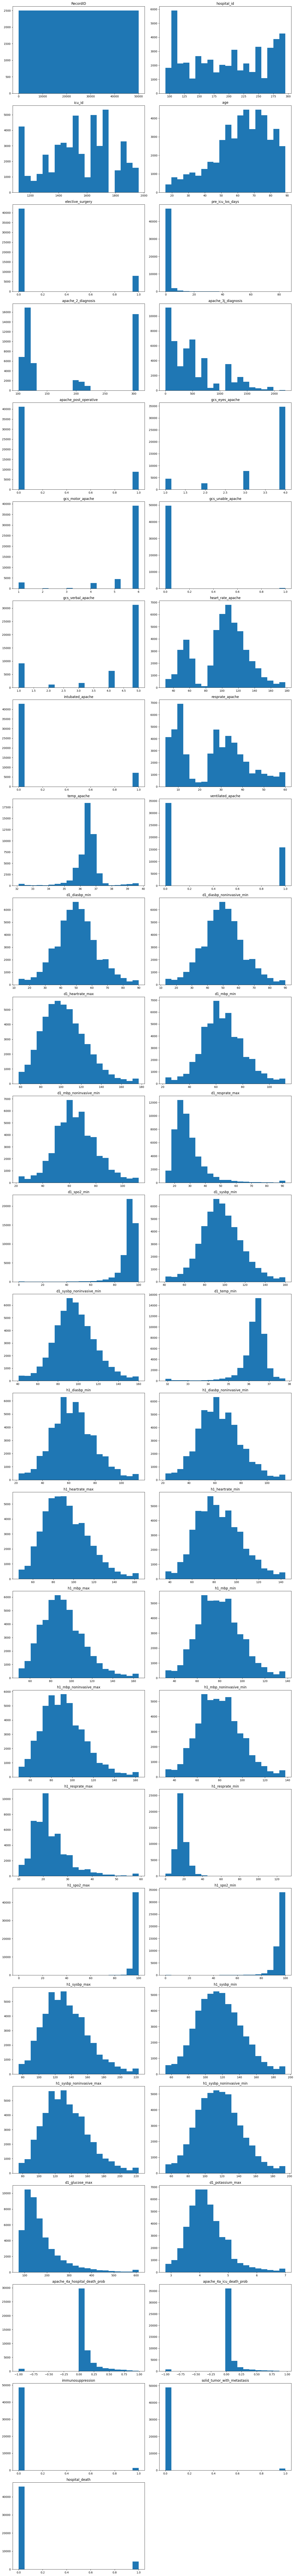

In [19]:
pd.pivot_table(Train, index='hospital_death', values=['RecordID', 'hospital_id', 'icu_id', 'age', 'elective_surgery',
       'pre_icu_los_days', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_mbp_min', 'd1_mbp_noninvasive_min',
       'd1_resprate_max', 'd1_spo2_min', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_min', 'd1_temp_min', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min',
       'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max',
       'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min',
       'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min',
       'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_potassium_max', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'immunosuppression',
       'solid_tumor_with_metastasis'])


,RecordID,age,apache_2_diagnosis,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_glucose_max,...,heart_rate_apache,hospital_id,icu_id,immunosuppression,intubated_apache,pre_icu_los_days,resprate_apache,solid_tumor_with_metastasis,temp_apache,ventilated_apache
hospital_death,,,,,,,,,,,,,,,,,,,,,
0,24995.454908,61.697467,185.143348,550.074070,0.075588,0.034820,0.185647,50.692567,50.704152,172.499770,...,99.063798,196.753165,1546.423284,0.025535,0.123100,0.744242,25.576304,0.018987,36.463242,0.282204
1,25053.604887,68.575892,159.145232,406.717494,0.352000,0.257176,0.079299,42.263947,42.285846,197.938363,...,111.875288,196.469110,1544.964961,0.050023,0.360535,1.382724,30.445318,0.044721,36.006655,0.670124


In [20]:
count = Train[(Train['elective_surgery'] == 1) & (Train['hospital_death'] == 1)].shape[0]
count1 = Train[(Train['elective_surgery'] == 1) & (Train['hospital_death'] == 0)].shape[0]
count2= Train[(Train['elective_surgery'] == 0) & (Train['hospital_death'] == 1)].shape[0]
count3 = Train[(Train['elective_surgery'] == 0) & (Train['hospital_death'] == 0)].shape[0]
toal=count2+count3
#print all counts
print(count,count1,count2,count3)
perc=count2/toal
t2=count+count1
perc2=count/t2
print(perc,perc2)#9 percent and 2 percent
#9 percent of people that did not have elective surgery died
#2 percent of people that had elective surgery died
#this means people die more if they do not have elective surgery,however total is misleading, total says 
# that more people die if they have elective surgery but that is because more people have elective surgery and the percentage suggests
#that they less people die if they have elective surgery
#shoudl we normalise the data to get a better picture?
#we will normlise the data


235 7683 4103 37979
0.09750011881564564 0.029679211922202575


NORMALISE ELECTIVE SURGERY

In [22]:
import seaborn as sns

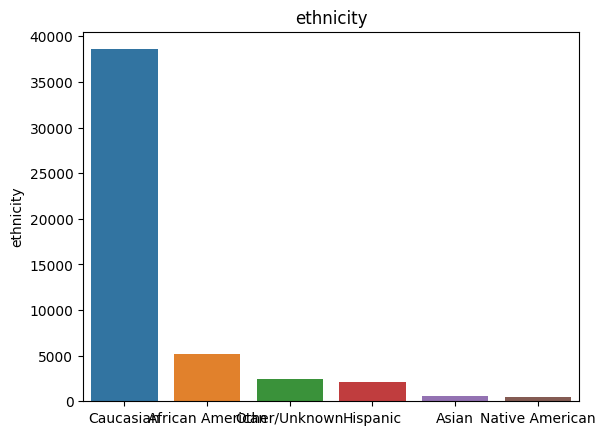

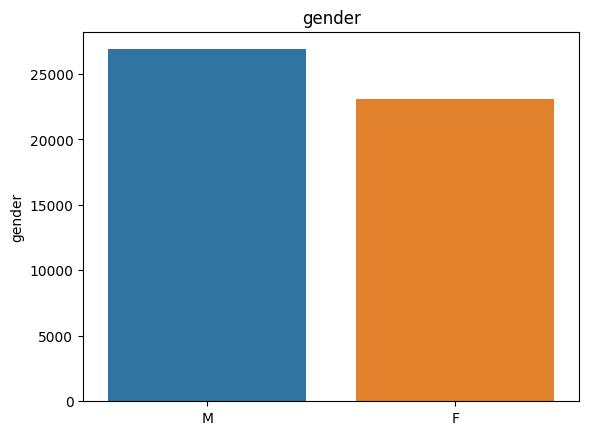

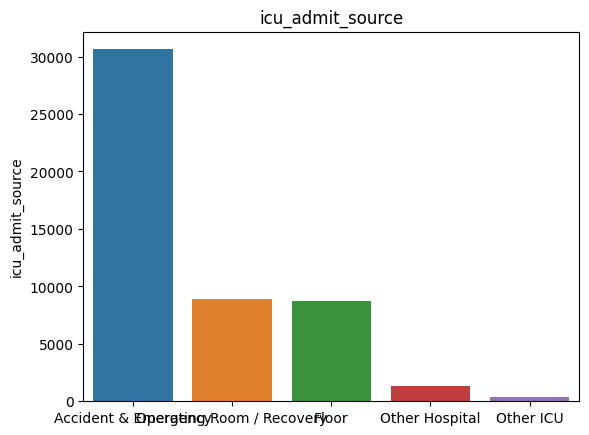

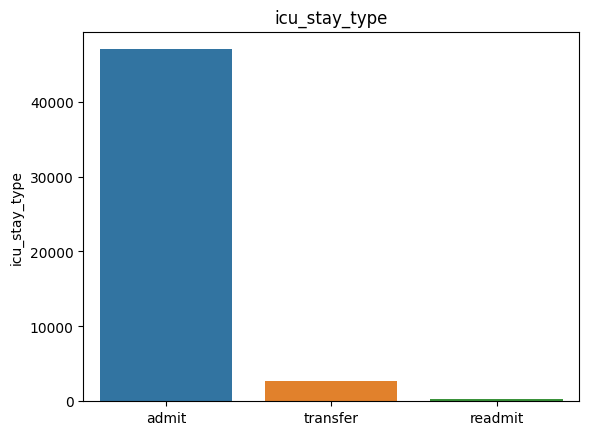

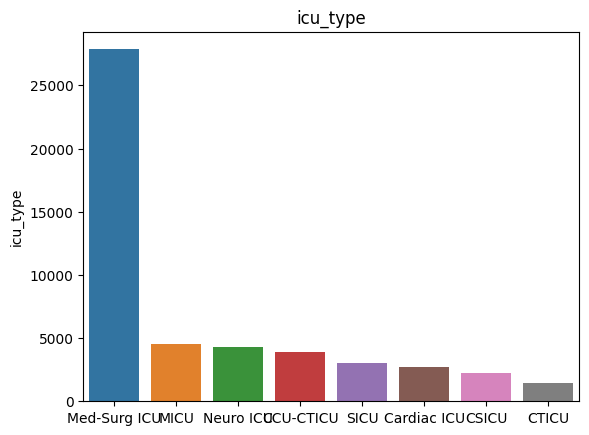

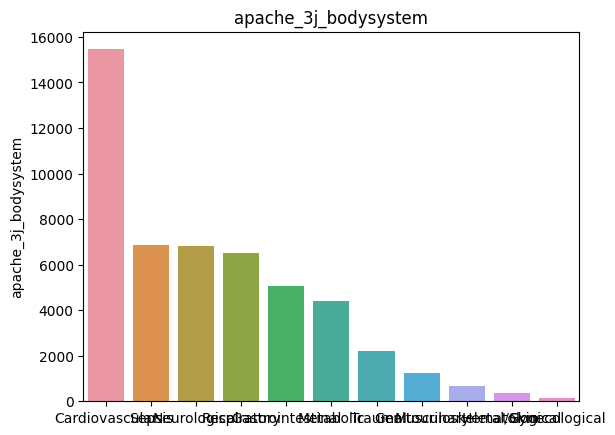

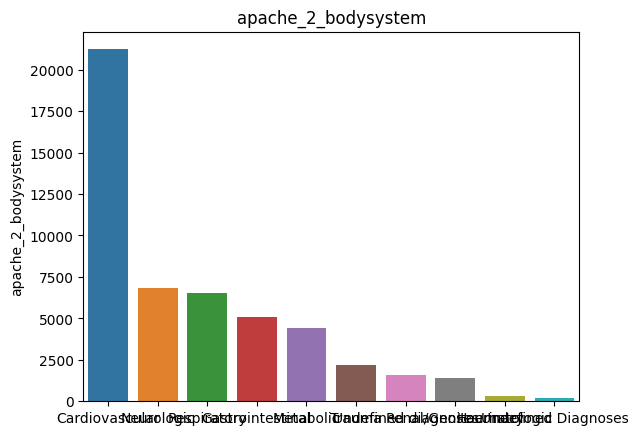

In [34]:
for i in categorical_data.columns:
    sns.barplot(x=categorical_data[i].value_counts().index, y=categorical_data[i].value_counts()).set_title(i)
    plt.show()

In [41]:
#make pivot table for categorical data
print(pd.pivot_table(Train, index='hospital_death', columns='ethnicity', values='RecordID', aggfunc='count'))
print(pd.pivot_table(Train, index='hospital_death', columns='gender', values='RecordID', aggfunc='count'))
print(pd.pivot_table(Train, index='hospital_death', columns='icu_admit_source', values='RecordID', aggfunc='count'))
print(pd.pivot_table(Train, index='hospital_death', columns='icu_stay_type', values='RecordID', aggfunc='count'))
print(pd.pivot_table(Train, index='hospital_death', columns='icu_type', values='RecordID', aggfunc='count'))
print(pd.pivot_table(Train, index='hospital_death', columns='apache_3j_bodysystem', values='RecordID', aggfunc='count'))
print(pd.pivot_table(Train, index='hospital_death', columns='apache_2_bodysystem', values='RecordID', aggfunc='count'))



ethnicity       African American  Asian  Caucasian  Hispanic  Native American  \
hospital_death                                                                  
0                           4772    574      35205      1904              404   
1                            421     55       3376       198               37   

ethnicity       Other/Unknown  
hospital_death                 
0                        2273  
1                         205  
gender              F      M
hospital_death              
0               21058  24601
1                2058   2279
icu_admit_source  Accident & Emergency  Floor  Operating Room / Recovery  \
hospital_death                                                             
0                                28036   7576                       8553   
1                                 2596   1187                        333   

icu_admit_source  Other Hospital  Other ICU  
hospital_death                               
0                           1156  

We can see that gender really has no effect on the final result, male and female die or dont very evenly


In [42]:
categorical_data.columns

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')

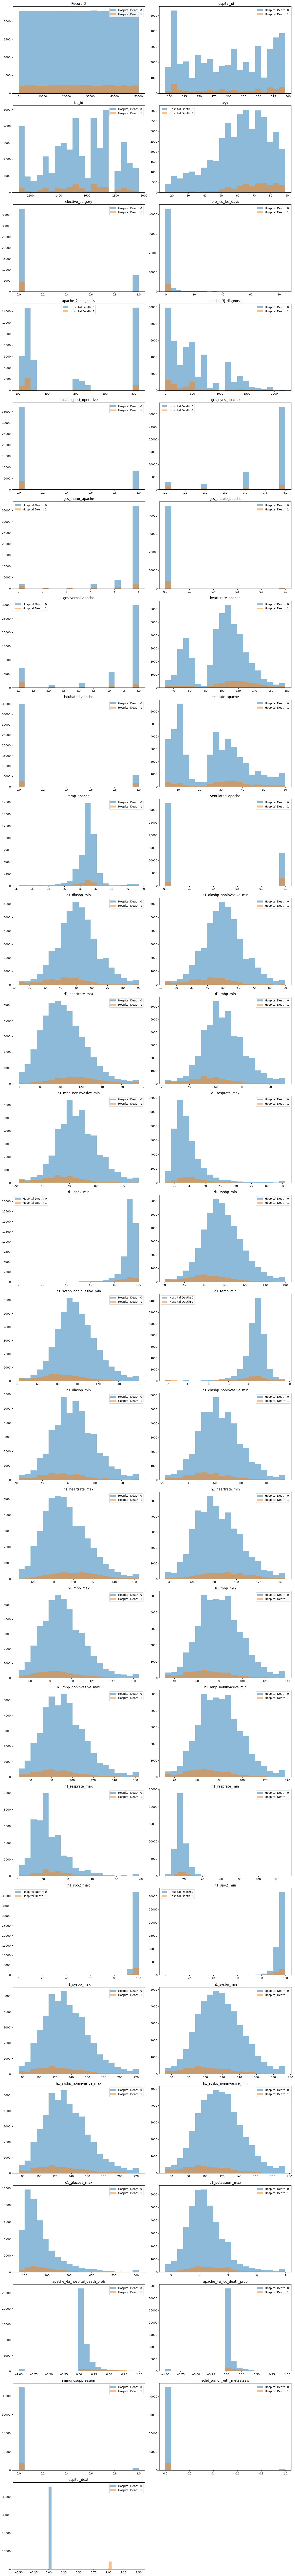

In [7]:
import matplotlib.pyplot as plt

# get the number of columns in numeric_data
num_cols = len(numeric_data.columns)

# set the number of columns and rows for the subplots
num_cols_per_row = 2
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

# create the subplots
fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

# flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# iterate over each column in numeric_data and create a histogram
for i, col in enumerate(numeric_data.columns):
    for hd in Train['hospital_death'].unique():
        axs[i].hist(numeric_data[Train['hospital_death']==hd][col], bins=20, alpha=0.5, label=f'Hospital Death: {hd}')
    axs[i].set_title(col)
    axs[i].legend()

# remove any unused subplots
for i in range(num_cols, num_rows*num_cols_per_row):
    fig.delaxes(axs[i])

# adjust the spacing between subplots
fig.tight_layout()
plt.show()
